In [1]:
%matplotlib inline
from model.agents import FlatTransitionAgent
from model.gridworld import make_task
from model import simulate_task, list_entropy, mutual_information, plot_results, simulate_one, simulate_task

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper', font_scale=1.5)

In [2]:
# define all of the task parameters
grid_world_size = (6, 6)

# define mapping between primitive action (a in [0, 1]) and cardinal movements
# (left, right, up down)
mapping_definitions = {
    0: {0: u'left', 1: u'up', 2: u'down', 3: u'right'},
    1: {4: u'up', 5: u'left', 6: u'right', 7: u'down'},
}

# define goal locations in (x, y) coordinate space
goal_locations = {
    0:(0, 0),
    1:(0, 5),
    2:(5, 0),
    3:(5, 5),
}


# assign goals and mappings to contexts
context_goals = [0, 3, 0, 3]
context_maps =  [0, 0, 1, 1]

# randomly start the agent somewhere in the middle of the map
start_locations = [(x, y) for x in range(1, 5) for y in range(1, 5)]

# the number of times each context is shown
context_balance = [4] * len(context_goals)

# the hazard rate determines a degree of auto correlation in the context orders. This is
# useful in human studies. The hazard rates is the defined by the probability of a 
# context change after i repeats is f(i)
hazard_rates = [0.5, 0.67, 0.67, 0.75, 1.0, 1.0]


task_kwargs = dict(context_balance=context_balance, 
                   context_goals=[goal_locations[g] for g in context_goals], 
                   context_maps=[mapping_definitions[m] for m in context_maps],
                   hazard_rates=hazard_rates, start_locations=start_locations,
                   grid_world_size=grid_world_size,
                   )

In [3]:
from tqdm import tnrange

n_sim = 50

res = [None] * n_sim
for ii in tnrange(n_sim):
    res[ii] = simulate_one(FlatTransitionAgent, ii, task_kwargs, evaluate=True)

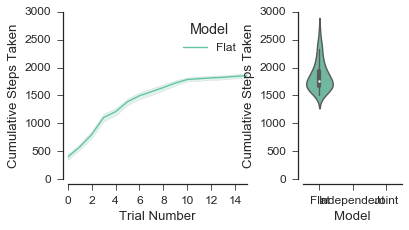

In [4]:
import pandas as pd
results = pd.concat(res)
results['Model'] = ['Flat'] * len(results)

plot_results(results)
# df0 = results[results['In goal']].groupby(['Model', 'Simulation Number', 'Trial Number']).mean()
# df0 = df0.groupby(level=[0, 1]).cumsum().reset_index()
# df0 = df0.rename(index=str, columns={'n actions taken': "Cumulative Steps Taken"})

# tsplot_kwargs = dict(
#     time='Trial Number',
#     value='Cumulative Steps Taken',
#     data=df0,
#     unit='Simulation Number',
# #     condition='Model',
# #     estimator=np.mean,
# #     ax=ax0,
#     color="Set2",
# )

# sns.tsplot(**tsplot_kwargs)

In [5]:
results

,End Location,In goal,KL Mapping,KL Rewards,Reward Collected,Start Location,Steps in Context,Times Seen Context,Trial Number,action,action_map,context,goal location,key-press,n actions taken,walls,Simulation Number,Model
0,"(1, 3)",False,15.491933,1.0,0.0,"(2, 3)",1.0,1.0,0,left,"{0: u'left', 1: u'up', 2: u'down', 3: u'right'}",1,"(5, 5)",0,1.0,[],0,Flat
1,"(0, 3)",False,15.427255,1.0,0.0,"(1, 3)",2.0,1.0,0,left,"{0: u'left', 1: u'up', 2: u'down', 3: u'right'}",1,"(5, 5)",0,2.0,[],0,Flat
2,"(0, 3)",False,15.362304,1.0,0.0,"(0, 3)",3.0,1.0,0,left,"{0: u'left', 1: u'up', 2: u'down', 3: u'right'}",1,"(5, 5)",0,3.0,[],0,Flat
3,"(0, 3)",False,15.362304,1.0,0.0,"(0, 3)",4.0,1.0,0,left,"{0: u'left', 1: u'up', 2: u'down', 3: u'right'}",1,"(5, 5)",0,4.0,[],0,Flat
4,"(0, 3)",False,15.362304,1.0,0.0,"(0, 3)",5.0,1.0,0,left,"{0: u'left', 1: u'up', 2: u'down', 3: u'right'}",1,"(5, 5)",0,5.0,[],0,Flat
5,"(0, 3)",False,15.362304,1.0,0.0,"(0, 3)",6.0,1.0,0,left,"{0: u'left', 1: u'up', 2: u'down', 3: u'right'}",1,"(5, 5)",0,6.0,[],0,Flat
6,"(0, 4)",False,15.362304,1.0,0.0,"(0, 3)",7.0,1.0,0,up,"{0: u'left', 1: u'up', 2: u'down', 3: u'right'}",1,"(5, 5)",1,7.0,[],0,Flat
7,"(0, 4)",False,15.297078,1.0,0.0,"(0, 4)",8.0,1.0,0,left,"{0: u'left', 1: u'up', 2: u'down', 3: u'right'}",1,"(5, 5)",0,8.0,[],0,Flat
8,"(0, 4)",False,15.297078,1.0,0.0,"(0, 4)",9.0,1.0,0,left,"{0: u'left', 1: u'up', 2: u'down', 3: u'right'}",1,"(5, 5)",0,9.0,[],0,Flat
9,"(0, 4)",False,15.297078,1.0,0.0,"(0, 4)",10.0,1.0,0,left,"{0: u'left', 1: u'up', 2: u'down', 3: u'right'}",1,"(5, 5)",0,10.0,[],0,Flat
